# Lecture 15 - Sorting
 
In this lecture and [Lecture 14](ME400_Lecture_14.ipynb), we tackle two of the most important practical problems in computing: *searching* and *sorting*.  In this lecture, we turn to *sorting*, the more challenging problem and one that was a focus of much research in the early years of computing for making searching easier.  We'll flex our knowledge of functions to help write clean and clear sorting programs.

## Quick Announcements:
  
  - "Pre"-Lecture 15 due Friday at 11:59 pm (whoops)
  - HW 6 due today (office hours 2:30--4 + advising + John's help)
  - Exam 2 next week!


### Objectives

By the end of this lesson, you should be able to

- Sort an array of numbers using brute-force, $\mathcal{O}(n^2)$ schemes like *selection sort*.
- Sort an array of numbers using divide-and-conquer, $\mathcal{O}(n\log n)$ schemes like *merge sort*.
- Apply built-in Python functions to sort sequences.



## Sorting is Hard Work



To sort a sequence, leverage what we know: **find the minimum value in a sequence**

The basic idea is simple.  Given a sequence of $n$ numbers to sort in increasing order, we 

1. Find the smallest value (just as we have previously done).
2. Swap it with the first element in the sequence.
3. Repeat steps (1) and (2) this process for the last $n-1$ items in the sequence.

This is **selection sort**.

```
0. '''The selection sort algorithm to sort an array'''
1. Input: a, n # sequence of numbers and its length
2. Set i = 0
3. While i < n do
4.   # Find the location k of the smallest element after a[i]
5.   Set j = i + 1
6.   Set k = i
7.   While j < n do
8.      If a[j] < a[k] then
9.         Set k = j
10.     Set j = j + 1
11.   # Switch the values of a[i] and a[k], putting them in order
12.   Swap a[i] and a[k]
13.   i = i + 1
14. Output a
```

**Exercise**: Apply this algorithm to the sequence [3, $1_0$, 4, $1_1$, 2].  Here, the subscript is used to count the number of times a 1 appears in the sequence.  Does the algorithm produce [$1_0$, $1_1$, 2, 3, 4] or [$1_1$, $1_0$, 2, 3, 4]?

In [1]:
def selection_sort(a):
    """Applies the selection sort algorithm to sort the sequence a."""
    i = 0
    while i < len(a):
        j = i + 1
        k = i
        while j < len(a):
            if a[j] < a[k]: # compare
                k = j
            j += 1
        a[i], a[k] = a[k], a[i]
        i += 1
    return a

In [ ]:
# Try out selection sort.  Does it work on any sequence?  

**Example** As implemented, `selection_sort(a)` sorts `a` **in place**, i.e., it *modifies the sequence*.  How to produce a new sorted sequence that does not change `a`?

## Better Sorting for Bigger Data

**Binary search** finds things in $\mathcal{O}(\log n)$ operations by **divide and conquer**.

The best algorithms (sorting and otherwise) use the same principle to turn apparently $\mathcal{O}(n^2)$ problems into $\mathcal{O}(n\log n)$ ones.

For our purposes, it is sufficient to consider the simplest of the divide and conquer approaches to sorting: [merge sort](https://en.wikipedia.org/wiki/Merge_sort)

### Merge Sort

Merge sort is simplest of $\mathcal{O}(n\log n)$ sorting algorithms:
  1. divide a sequence into smaller chunks that can be sorted directly 
  2. merge two sorted (sub)sequences. 
  
Visual representation: https://www.youtube.com/watch?v=63IMRspwdQ8.

### Merging Sorted Sequences

Main work of merge sort is to merge *sorted* sequences into one larger, *sorted* sequence.  

Example: `a = [1, 8]` and `b = [5, 8]` are merged to produce `c = [1, 5, 7, 8]`.  

```
'''Merge: an algorithm to merge two sorted sequences'''
Input: a, b, m, n
# Initialize the sorted sequence
Set c to be a sequence of length (m+n) 
# Initialize the counter for a, b, and c
Set i = 0, j = 0, and k = 0
While k < m + n do
    If i < m and j < n then
        # Both a and b still have elements to merge
        If a[i] <= b[j] then
            Set c[k] = a[i] 
            Set i = i + 1
        Otherwise
            Set c[k] = b[j]
            Set j = j + 1
    Otherwise, if i == m then
        # Only b has elements left to merge
        Set c[k] = b[j]
        Set j = j + 1
    Otherwise,
        # Only a has elements left to merge
        Set c[k] = a[i]
        Set i = i + 1
    Set k = k + 1
Output: c
```

### Divide and Conquer

Merging is half the battle: we need to dive down and get the smaller arrays to sort.  

A natural approach is to use *recursion*.

In [1]:
def divide_and_print(a):
    print('-'*len(a)+'>', a)
    if len(a) <= 2:
        return
    else:
        divide_and_print(a[:len(a)//2])
        divide_and_print(a[len(a)//2:])
    return
divide_and_print([8,7,6,5,4,3,2,1])

--------> [8, 7, 6, 5, 4, 3, 2, 1]
----> [8, 7, 6, 5]
--> [8, 7]
--> [6, 5]
----> [4, 3, 2, 1]
--> [4, 3]
--> [2, 1]


```
'''Merge Sort: an algorithm to sort the sequence a'''
Input: a
Set n to the length of a
If n == 2 and a[0] > a[1] then
    Swap a[0] and a[1]
Otherwise, if n > 2 then
    Set a_L to be the first half of a 
    Set a_R to be the second half of a
    Call Merge Sort to sort a_L and assign 
      its output to a_L
    Call Merge Sort to sort a_R and assign
      its output to a_R
    Call Merge to combine a_L and a_R, and assign
      its output to a
# Note, nothing is done when n is 1
Output: a
```

Merge sort is $\mathcal{O}(n \log n)$:

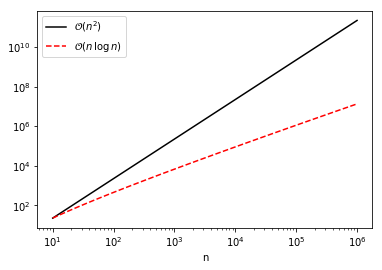

In [18]:
import numpy as np
import matplotlib.pyplot as plt
n = np.logspace(1, 6, 100)
plt.loglog(n, 0.23*n**2, 'k-', label='$\mathcal{O}(n^2)$')
plt.loglog(n, n*np.log(n), 'r--', label='$\mathcal{O}(n\, \log \, n)$')
plt.xlabel('n')
plt.legend()
plt.show()

##  Built-in Sorting

Several options:
- `sorted`
- `list.sort`
- `np.sort`

## Recap

By now, you should be able to

- Sort an array of numbers using brute-force, $\mathcal{O}(n^2)$ schemes like *selection sort*.
- Sort an array of numbers using divide-and-conquer, $\mathcal{O}(n\log n)$ schemes like *merge sort*.
- Apply built-in Python functions to sort sequences.

Office hours today 2:30--4 intermixed with advising.  John should be available for part of that time.
